### Project Proposal: 

## Classification of Attributes to Best Predict Heart Disease 

#### Introduction

I. According to Statistics Canada, heart disease is the second leading cause of death in 2019, accounting for 18.5% of all deaths. Therefore by using the Heart Disease data set, we will determine the three attributes (i.e. characteristics or factors) that can best predict the presence of heart disease in a person. 

The data set contains four datasets concerning heart-disease related characteristics. Each data set contains 14 attributes organized into 14 variables and 302 observations. All the data is of type double, and they were collected from the following institutes:
Cleveland Clinic Foundation (cleveland.data)
Hungarian Institute of Cardiology, Budapest (hungarian.data)
V.A. Medical Center, Long Beach, CA (long-beach-va.data)
University Hospital, Zurich, Switzerland (switzerland.data)

II. The question we will attempt to answer with this project is: Which three attribute can best predict the presence of heart diesease in patients?

III. The dataset used for this project is the 'Heart Disease Data Set' provided by the UCL Machine Learning Repository. The database contains 76 attributes, but we will only categorize a subset of six of them, of which is already known to be common indication of heart disease as previously mentioned. Additionally, only the Cleveland sub database will be used, as it is the only one only by ML researchers to this date. (Or try Hungary/Switzerland?).

#### Preliminary Exploratory Data Analysis

In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
library(data.table)
options(repr.matrix.max.rows = 6)

In [5]:

heart_disease_data <- read_csv("processed.cleveland.data")
names(heart_disease_data) <- c("age", "sex", "chest_pain_type", "resting_bp", "chol", "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "oldpeak", "slope", "ca", "thal", "presence_of_h_d")

male <- heart_disease_data  %>%
filter(sex == 1) %>%
mutate(sex = "Male")

female <- heart_disease_data %>%
filter(sex == 0) %>%
mutate(sex = "Female")

heart_disease_data <- rbind(male, female)
heart_disease_data <- heart_disease_data %>%
select(-chest_pain_type, -fasting_blood_sugar, -resting_electrocardiographic_results, -exercise_induced_angina, -oldpeak, -slope, -thal, -ca)

heart_disease_data_0 <-heart_disease_data %>%
filter(presence_of_h_d == 0)

heart_disease_data_1 <-heart_disease_data %>%
filter(presence_of_h_d > 0) %>%
mutate(presence_of_h_d = 1)

heart_disease_data<-rbind(heart_disease_data_0, heart_disease_data_1) %>% 
mutate(presence_of_h_d = as_factor(presence_of_h_d))

# heart_disease_data
heart_split <- initial_split(heart_disease_data, prop = 0.66, strata = sex) 
training_data <- training(heart_split) 
training_data


# training_data
#summ <- colMeans(training_data %>% select(-sex, -presence_of_h_d))
#summ
data_mean <- 
    modify(training_data, mean) %>% head(1)
data_mean



Warning message:
“Duplicated column names deduplicated: '1.0' => '1.0_1' [3], '1.0' => '1.0_2' [6], '0.0' => '0.0_1' [12]”
Parsed with column specification:
cols(
  `63.0` = col_double(),
  `1.0` = col_double(),
  `1.0_1` = col_double(),
  `145.0` = col_double(),
  `233.0` = col_double(),
  `1.0_2` = col_double(),
  `2.0` = col_double(),
  `150.0` = col_double(),
  `0.0` = col_double(),
  `2.3` = col_double(),
  `3.0` = col_double(),
  `0.0_1` = col_character(),
  `6.0` = col_character(),
  `0` = col_double()
)



age,sex,resting_bp,chol,maximum_heart_rate_achieved,presence_of_h_d
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
37,Male,130,250,187,0
56,Male,120,236,178,0
44,Male,120,263,173,0
⋮,⋮,⋮,⋮,⋮,⋮
58,Female,170,225,146,1
57,Female,140,241,123,1
57,Female,130,236,174,1


Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


age,sex,resting_bp,chol,maximum_heart_rate_achieved,presence_of_h_d
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.44279,NA,132.3433,246.3483,148.3582,NA


Note:
There is no missing data in the training data set.

#### Visualization example

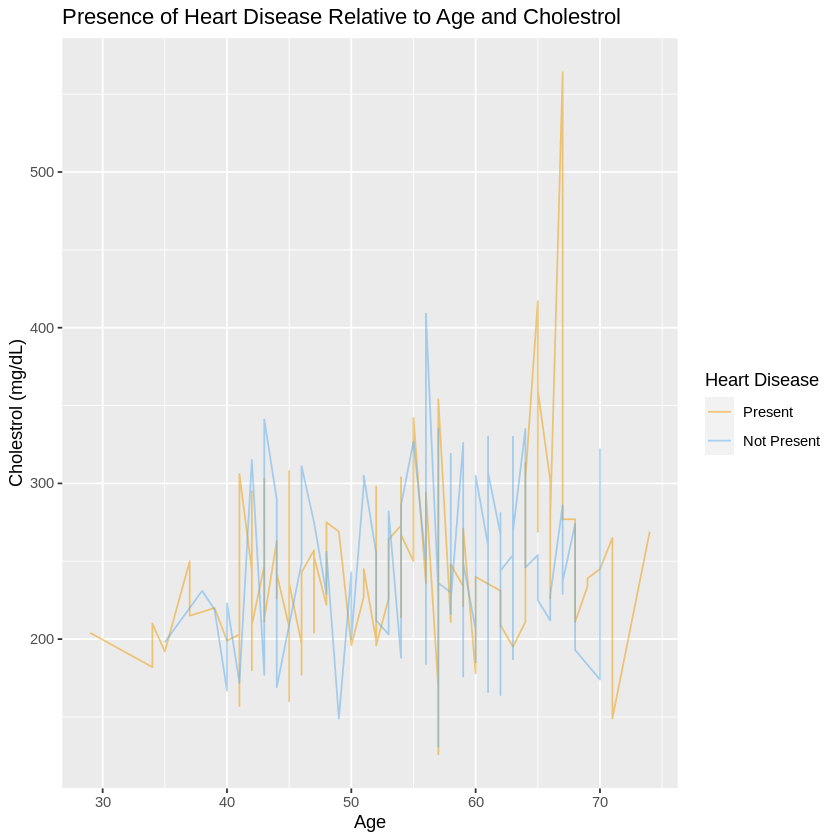

In [6]:
my_plot<- training_data %>%
       ggplot(aes(x = age, y = chol, color = presence_of_h_d)) +
       geom_line(alpha = 0.5)+
        scale_color_manual(labels = c("Present", "Not Present"), 
                     values = c("orange2", "steelblue2")) + 
       labs(x = "Age", y = "Cholestrol (mg/dL)", color = "Heart Disease") +
       ggtitle("Presence of Heart Disease Relative to Age and Cholestrol")

my_plot

#### Methods

I. We will conduct our data analysis by using the k-nearest neighbors model.

II. The variables and columns we will use are those that contain the data of our chosen attributes. Using the conclusions from pre-existing research, we found that the most common factors of heart diseases are high blood pressure, high cholesterol, age, and smoking to name a few. Gender also plays a factor, as men have been found to be at higher risk of heart disease. The attributes that will not be analysized are removed from the data set. Although we wanted to test smoking as a factor, we were not able to include it since it was not provided in the data set we selected.

III. We will visualize our results in the form of a scatterplot. 

#### Expected Outcomes and Significance

I  Out of our selected factors, we expect to find cholesterol level, age, and maximum heart rate achieved to be the three attributes with the strongest correlation to heart disease. 

II. The impacts of these findings would contribute to developing the current knowledge of factors of heart disease. Identifying the most influential components may help people decrease their odds of heart disease upon knowing which things are at play. Additionally, for factors that are controllable, people will be more conscious of their health and hopefully be inspired to change poor daily habits that could lead to heart disease.

III. Our findings prompt the question: How do the classified attributes determining the presence of heart disease differ between demographics? One such example being ethnicity. 